In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib import colors
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

cmap = ("#F3AB60", "#D6B2B1", "#B9C0C9", "#682F2F", "#9E726F", "#9F8A78")
sbn.set_theme(rc={'figure.figsize':(11.7,8.27)})
print("JAJAL")

## DATA TOF SHEET I

- [x] Pembersihan
- [x] Visualisasi Pie dan Bar

In [4]:
dataTOFSheetI = pd.read_csv(
    'Tof Sheet 1.csv'        # // Lokasi Dari Drive untuk Dataset Tersebut
    )
data_copy = (dataTOFSheetI.iloc[2].copy(), dataTOFSheetI.iloc[1].copy())
dataTOFSheetI.iloc[1], dataTOFSheetI.iloc[2] = data_copy[0], data_copy[1]
dataTOFSheetI

,bulan,Sum of Tagihan Before TOF,Sum Of Tagihan After TOF
0,Juni,15.677.963.632.63,17.956.099.003.75
1,Juli,16.346.044.128.80,17.836.271.006.00
2,Agustus,12.383.307.960.73,15.763.685.762.28


In [5]:
# //  Data 'After' dibersihkan untuk bisa di casting ke dalam bentuk Float
dataTOFSheetI['Sum Of Tagihan After TOF'] = dataTOFSheetI['Sum Of Tagihan After TOF'].apply(lambda x: x.replace(".", ""))
dataTOFSheetI['Sum Of Tagihan After TOF'] = dataTOFSheetI['Sum Of Tagihan After TOF'].apply(lambda x: x[0:-2] + "." + x)

# //  Data 'Before' dibersihkan untuk bisa di casting ke dalam bentuk Float
dataTOFSheetI['Sum of Tagihan Before TOF'] = dataTOFSheetI['Sum of Tagihan Before TOF'].apply(lambda x: x.replace(".", ""))
dataTOFSheetI['Sum of Tagihan Before TOF'] = dataTOFSheetI['Sum of Tagihan Before TOF'].apply(lambda x: x[0:-2] + "." + x)

# // Casting dari String menjadi bentuk Float
dataTOFSheetI['Sum Of Tagihan After TOF'] = dataTOFSheetI['Sum Of Tagihan After TOF'].astype(float, copy=True)
dataTOFSheetI['Sum of Tagihan Before TOF'] = dataTOFSheetI['Sum of Tagihan Before TOF'].astype(float, copy=True)


# Visualisasi TOF Sheet I

C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\584604106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(dataTOFSheetI, x=dataTOFSheetI['bulan'], y=dataTOFSheetI['Sum of Tagihan Before TOF'], palette=cmap)


<Axes: xlabel='bulan', ylabel='Sum of Tagihan Before TOF'>

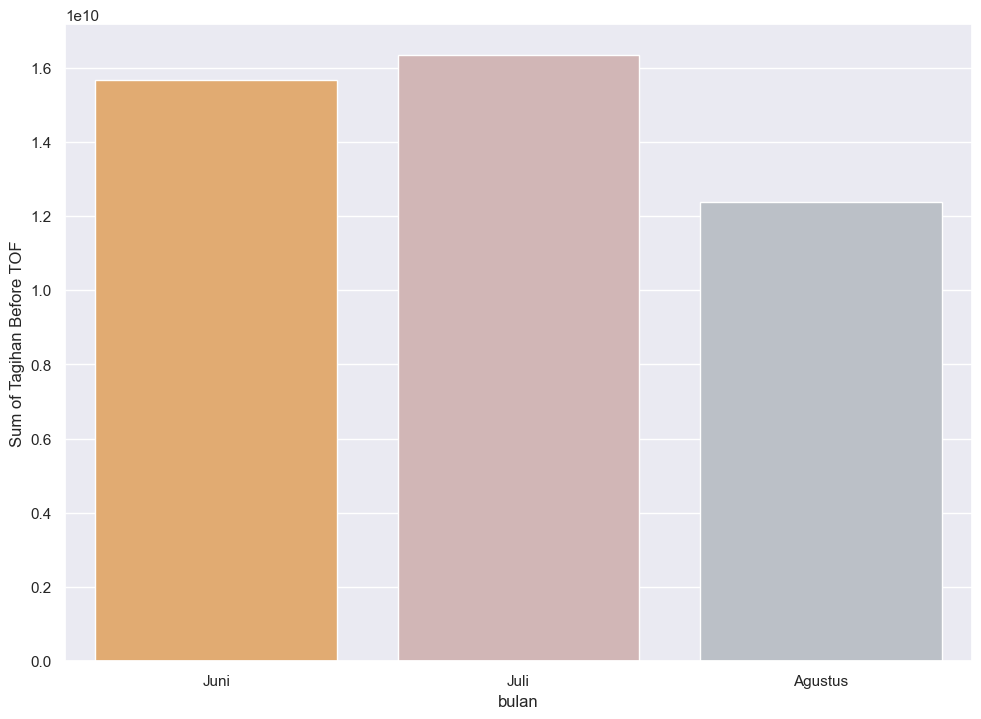

In [6]:
sbn.barplot(dataTOFSheetI, x=dataTOFSheetI['bulan'], y=dataTOFSheetI['Sum of Tagihan Before TOF'], palette=cmap)

C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\2641282602.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(dataTOFSheetI, x=dataTOFSheetI['bulan'], y=dataTOFSheetI['Sum Of Tagihan After TOF'], palette=cmap)


<Axes: xlabel='bulan', ylabel='Sum Of Tagihan After TOF'>

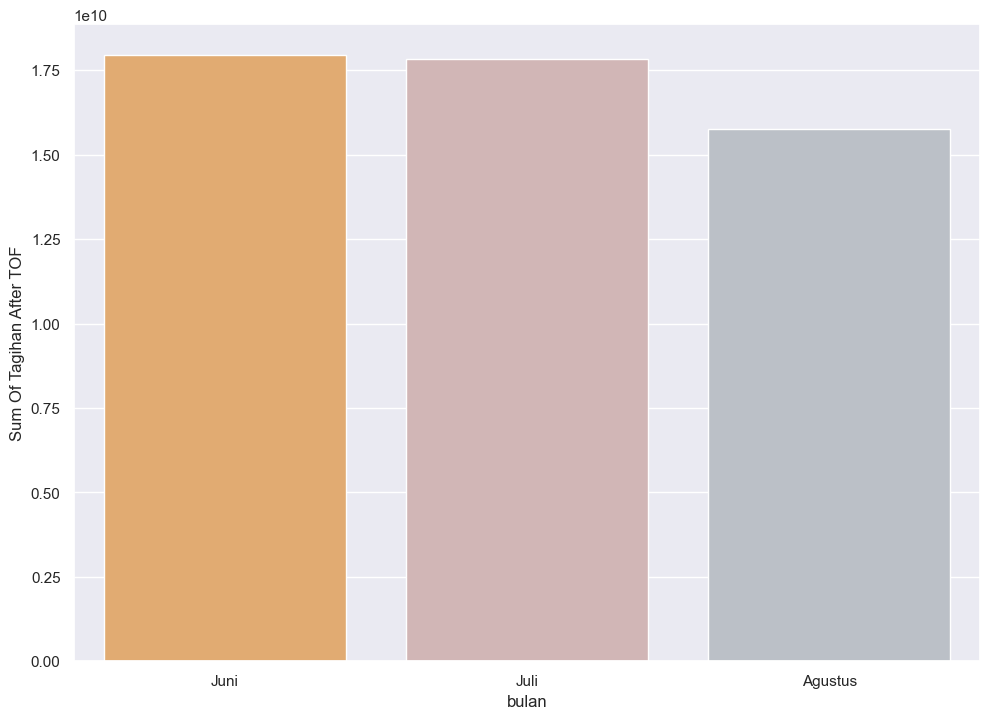

In [7]:

sbn.barplot(dataTOFSheetI, x=dataTOFSheetI['bulan'], y=dataTOFSheetI['Sum Of Tagihan After TOF'], palette=cmap)

([<matplotlib.patches.Wedge at 0x2c04db9d6d0>,
 [Text(0.4899783075290967, 0.9848458042510625, 'Juni'),
  Text(-1.1432275201942903, -0.27139608890036226, 'Juli'),
  Text(0.7042041633573092, -0.845042304450039, 'Agustus')],
 [Text(0.2672608950158709, 0.5371886205005795, '35.3%'),
  Text(-0.6567477243669327, -0.15590839149595279, '36.8%'),
  Text(0.3841113618312595, -0.4609321660636576, '27.9%')])

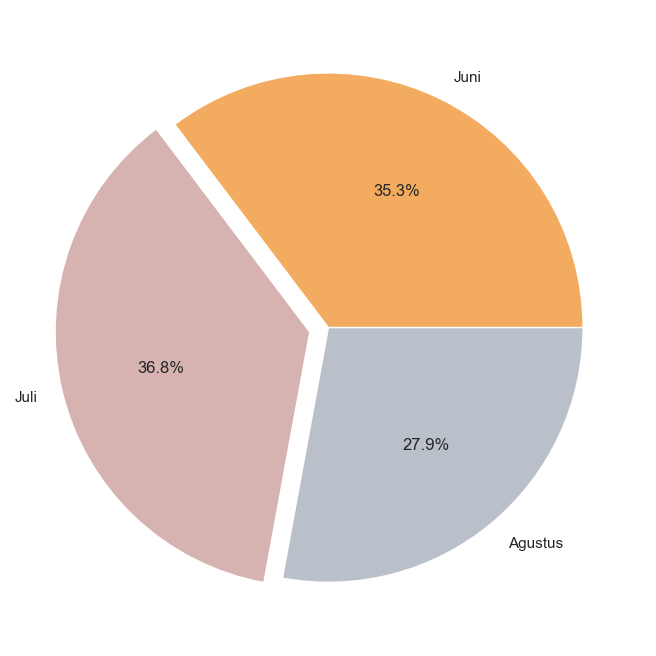

In [8]:
# // Visualisasi Dalam bentuk pie chart untuk sebelum
data_pie = dataTOFSheetI.drop(columns="bulan")
fig, ax = plt.subplots()
ax.pie(data_pie['Sum of Tagihan Before TOF'], labels=dataTOFSheetI.bulan, autopct='%1.1f%%', colors=cmap, explode=(0.0, 0.075, 0.0))

([<matplotlib.patches.Wedge at 0x2c00f06d150>,
 [Text(0.5390783474817954, 1.0440400065496995, 'Juni'),
  Text(-1.0901983169375409, -0.1465183597592913, 'Juli'),
  Text(0.6303602019004148, -0.9014688102536152, 'Agustus')],
 [Text(0.30968330600018035, 0.5997676633370613, '34.8%'),
  Text(-0.5946536274204768, -0.0799191053232498, '34.6%'),
  Text(0.3438328374002262, -0.4917102601383355, '30.6%')])

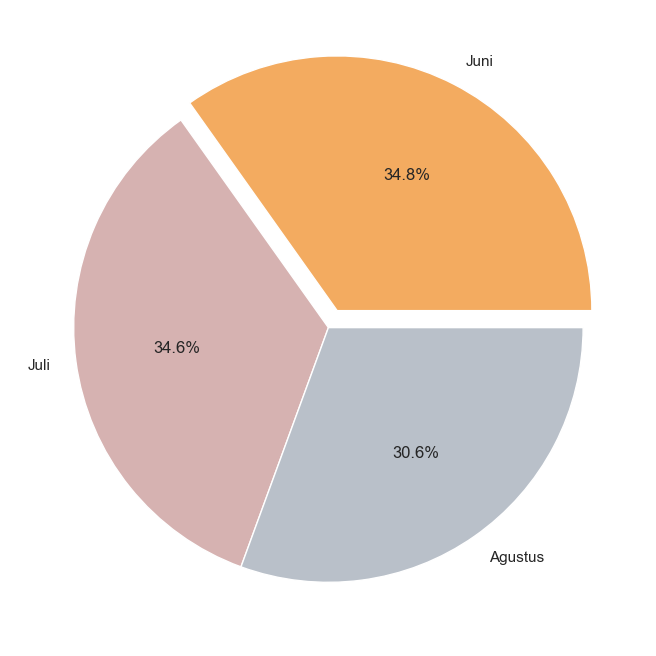

In [9]:
data_pie = dataTOFSheetI.drop(columns="bulan")
fig, ax = plt.subplots()
ax.pie(data_pie['Sum Of Tagihan After TOF'], labels=dataTOFSheetI.bulan, autopct='%1.1f%%', colors=cmap, explode=(0.075, 0.0, 0.0))

# DATA TOF SHEET II

- [x] Melakukan Imputasi pada data yang kosong / hilang
- [x] Statistika Deskriptif
- [ ] Box Plot Dan Melihat Outlier
- [ ]


In [10]:
dataTOFSheetII = pd.read_csv(                                                   # // Load Data TOF Tahun 2025
    'Tof Sheet 2.csv'        # // Lokasi Dari Drive untuk Dataset Tersebut
    )
dataTOFSheetII = dataTOFSheetII.drop(columns="NOMOR")

In [11]:
# // Membersihkan Data
dataTOFSheetII = dataTOFSheetII.replace(" -   ", np.nan)



dataTOFSheetII[' PRODUKSI '] = dataTOFSheetII[' PRODUKSI '].apply(lambda x: x.replace(",", ""))
dataTOFSheetII[' TARIF BEFORE TOF '] = dataTOFSheetII[' TARIF BEFORE TOF '].apply(lambda x: x.replace(",", "") if type(x) == str else x)
dataTOFSheetII[' TARIF AFTER TOF '] = dataTOFSheetII[' TARIF AFTER TOF '].apply(lambda x: x.replace(",", ""))
dataTOFSheetII[' TAGIHAN BEFORE TOF '] = dataTOFSheetII[' TAGIHAN BEFORE TOF '].apply(lambda x: x.replace(",", "") if type(x) == str else x)
dataTOFSheetII[' TAGIHAN AFTER TOF '] = dataTOFSheetII[' TAGIHAN AFTER TOF '].apply(lambda x: x.replace(",", ""))

dataTOFSheetII[' PRODUKSI '] = dataTOFSheetII[' PRODUKSI '].astype(float)
dataTOFSheetII[' TARIF AFTER TOF '] = dataTOFSheetII[' TARIF AFTER TOF '].astype(float)
dataTOFSheetII[' TARIF BEFORE TOF '] = dataTOFSheetII[' TARIF BEFORE TOF '].astype(float)
dataTOFSheetII[' TAGIHAN AFTER TOF '] = dataTOFSheetII[' TAGIHAN AFTER TOF '].astype(float)
dataTOFSheetII[' TAGIHAN BEFORE TOF '] = dataTOFSheetII[' TAGIHAN BEFORE TOF '].astype(float)





In [12]:
# // Melakukan Imputasi
dataTOFSheetII[' TAGIHAN BEFORE TOF '] = dataTOFSheetII[' TAGIHAN BEFORE TOF '].fillna(value=dataTOFSheetII[' TAGIHAN BEFORE TOF '].mean())
dataTOFSheetII[' TARIF BEFORE TOF '] = dataTOFSheetII[' TARIF BEFORE TOF '].fillna(value=dataTOFSheetII[' TARIF BEFORE TOF '].mean())

dataTOFSheetII = dataTOFSheetII.fillna(value="-")

print(dataTOFSheetII.isnull().sum(), "\n")
# // dataTOFSheetII = dataTOFSheetII.dropna()


TAHUN                   0
BULAN                   0
TERMINAL                0
NAMA DERMAGA            0
NAMA KAPAL              0
NAMA AGENT              0
KOMODITI                0
KEGIATAN                0
STATUS PBM BEFORE       0
PBM-TOF                 0
KEMASAN                 0
NAMA TERTAGIH           0
NAMA PBM                0
NAMA JASA               0
 PRODUKSI               0
 TARIF BEFORE TOF       0
 TAGIHAN BEFORE TOF     0
 TARIF AFTER TOF        0
 TAGIHAN AFTER TOF      0
SATUAN                  0
dtype: int64 



In [13]:
dataTOFSheetII.describe()

,TAHUN,PRODUKSI,TARIF BEFORE TOF,TAGIHAN BEFORE TOF,TARIF AFTER TOF,TAGIHAN AFTER TOF
count,2140.0,2140.000000,2140.000000,2.140000e+03,2140.000000,2.140000e+03
mean,2025.0,3335.990874,9021.112652,2.709139e+07,11112.905140,2.409161e+07
std,0.0,5394.410777,10487.728428,8.627813e+07,15015.733903,4.964039e+07
min,2025.0,0.010000,40.000000,3.800000e+01,40.000000,3.800000e+01
25%,2025.0,200.000000,3825.000000,2.555482e+06,3431.000000,1.147500e+06
50%,2025.0,1500.000000,7334.500000,1.529888e+07,5100.000000,7.593858e+06
75%,2025.0,4191.020000,9021.112652,2.709139e+07,15925.000000,2.506056e+07
max,2025.0,37003.000000,88550.000000,2.164397e+09,229200.000000,1.079551e+09


## Visualisasi Dan Pemodelan
### Univariat

In [14]:
numericData = [" PRODUKSI ", " TARIF BEFORE TOF ", " TAGIHAN BEFORE TOF ", " TARIF AFTER TOF ", " TAGIHAN AFTER TOF "]
columnLabels = list(dataTOFSheetII.columns.values)
columnLabels.append('Outlier Sebab')
columnLabels.append('Indikasi')

In [15]:
data_outlier = pd.DataFrame(columns=columnLabels)

for i in numericData:
    # // Quartile Beserta Inter Quartile Range untuk memisahkan outlier
    q1 = dataTOFSheetII[i].quantile(0.25)
    q2 = dataTOFSheetII[i].median()
    q3 = dataTOFSheetII[i].quantile(0.75)
    iqr = q3 - q1
    llo = q1 - 1.5 * iqr
    hlo = q3 + 1.5 * iqr
    
    for data in range(len(dataTOFSheetII[i])):
        if dataTOFSheetII[i][data] <= llo:
            data_outlier.loc[data] = dataTOFSheetII.loc[data]
            data_outlier.loc[data, "Outlier Sebab"] = i
            data_outlier.loc[data, "Indikasi"] = "-"
        elif dataTOFSheetII[i][data] >= hlo:
            data_outlier.loc[data] = dataTOFSheetII.loc[data]
            data_outlier.loc[data, "Outlier Sebab"] = i
            data_outlier.loc[data, "Indikasi"] = "+"
dataTOFSheetII = dataTOFSheetII.drop(list(data_outlier.index.values)).reset_index(drop=True) # // Memisahkan Data Utama dari Outlier

data_outlier

,TAHUN,BULAN,TERMINAL,NAMA DERMAGA,NAMA KAPAL,NAMA AGENT,KOMODITI,KEGIATAN,STATUS PBM BEFORE,PBM-TOF,...,NAMA PBM,NAMA JASA,PRODUKSI,TARIF BEFORE TOF,TAGIHAN BEFORE TOF,TARIF AFTER TOF,TAGIHAN AFTER TOF,SATUAN,Outlier Sebab,Indikasi
6,2025,JUN,TERMINAL JAMRUD,JAMRUD UTARA,MV. DL LAVENDER,"DALIAN PUTRA MARITIM, PT",STEEL BILLETS,IMPORT,NONPELINDO,NONPELINDO,...,"WANGSA PRATAMA INTERNASIONAL, PT",JASA DERMAGA,30049.0,3825.0,114937792.0,3825.0,114937792.0,TON,TAGIHAN AFTER TOF,+
10,2025,JUN,TERMINAL JAMRUD,JAMRUD UTARA,MV. DL LAVENDER,"DALIAN PUTRA MARITIM, PT",STEEL BILLETS,IMPORT,NONPELINDO,NONPELINDO,...,"WANGSA PRATAMA INTERNASIONAL, PT",JASA STEVED,30049.0,3452.0,103719463.0,15925.0,478531854.0,TON,TAGIHAN AFTER TOF,+
17,2025,JUN,TERMINAL JAMRUD,JAMRUD UTARA,MV. DL LAVENDER,"DALIAN PUTRA MARITIM, PT",STEEL BILLETS,IMPORT,NONPELINDO,NONPELINDO,...,"WANGSA PRATAMA INTERNASIONAL, PT",PENUMPUKAN MASA I,30049.0,9021.112652,27091388.735205,1500.0,45073644.0,TON,PRODUKSI,+
29,2025,AGUSTUS,TERMINAL JAMRUD,JAMRUD UTARA,MV. HAO XIANG 11,LAUTAN LUAS MARITIM,STEEL BILLETS,IMPORT,NONPELINDO,NONPELINDO,...,"WANGSA PRATAMA INTERNASIONAL, PT",JASA DERMAGA,15090.92,3825.0,57722769.0,3825.0,57722769.0,TON,PRODUKSI,+
35,2025,AGUSTUS,TERMINAL JAMRUD,JAMRUD UTARA,MV. HAO XIANG 11,LAUTAN LUAS MARITIM,STEEL BILLETS,IMPORT,NONPELINDO,NONPELINDO,...,"WANGSA PRATAMA INTERNASIONAL, PT",JASA STEVED,15090.92,3452.0,52093855.84,15925.0,240322901.0,TON,TAGIHAN AFTER TOF,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2025,AGUSTUS,TERMINAL JAMRUD,JAMRUD SELATAN,LIUS MAHAKAM,"AMARTA JAYA TRANSLOGISTIK, PT",BESI ULIR,MUAT,NONPELINDO,NONPELINDO,...,"BERKAH RISQY ABADI, PT",JASA STEVED,4279.4,11248.0,48134668.7,19325.0,82699366.0,TON,TAGIHAN AFTER TOF,+
1962,2025,AGUSTUS,TERMINAL MIRAH,MIRAH TIMUR,HASIL BAHARI 8,"SURABAYA PETROLEUM TRANSPORT, PT",PUPUK,MUAT,NONPELINDO,NONPELINDO,...,"BERKAH RISQY ABADI, PT",JASA STEVED,4700.0,7788.0,36603600.0,20825.0,97877500.0,TON,TAGIHAN AFTER TOF,+
1965,2025,AGUSTUS,TERMINAL MIRAH,MIRAH TIMUR,DAMAI BAHARI,"SURABAYA PETROLEUM TRANSPORT, PT",PUPUK,MUAT,NONPELINDO,NONPELINDO,...,"BERKAH RISQY ABADI, PT",JASA STEVED,2979.0,7788.0,23200452.0,20825.0,62037675.0,TON,TAGIHAN AFTER TOF,+
1994,2025,AGUSTUS,TERMINAL JAMRUD,JAMRUD UTARA,MV. BBC KIMBERLEY,"PILAR LIMA SAMUDERA, PT",BARANG PROYEK,IMPORT,NONPELINDO,NONPELINDO,...,"ATHOTAMA CITRA SURABAYA, PT",JASA STEVED,4369.86,11248.0,49152185.28,17550.0,76691043.0,TON,TAGIHAN AFTER TOF,+


In [16]:
data_outlier["NAMA AGENT"].value_counts()

NAMA AGENT
SARI AMPENAN, PT                            69
PT.TRANS MARITIM AGENSI                     25
LAUTAN LUAS MARITIM                         24
SAMUDERA SUKSES MAKMUR, PT                  24
ARMADA ANAK LAUT                            20
BAHARI LAJU ANUGERAH, PT                    20
SAMUDERA AGENCIES INDONESIA, PT             20
PULAU WEH, PT                               18
MATSUURA INDONESIA JAYA, PT                 18
PT MUTIARA SIDA GEMILANG                    18
ANUGERAH TIRTA SAMUDRA, PT                  17
GESURI LLOYD, PT                            15
PELAYARAN BAHTERA ADHIGUNA (PERSERO), PT    13
MUTIARA TIRTA DEWATA                        13
SAHA MITRA SAMUDERA, PT                     12
PT. ELEANOR PRADANA SHIPPING                10
PELAYARAN KARANA LINE, PT                    9
TANTA BAHARI PERKASA                         8
ANDALAN PACIFIC LINE PT                      7
GOLDEN OCEAN LINE, PT                        7
SURABAYA PETROLEUM TRANSPORT, PT             7
VI

C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\1980823762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sbn.barplot(data_outlier["NAMA AGENT"].value_counts().sort_values(), palette=cmap)


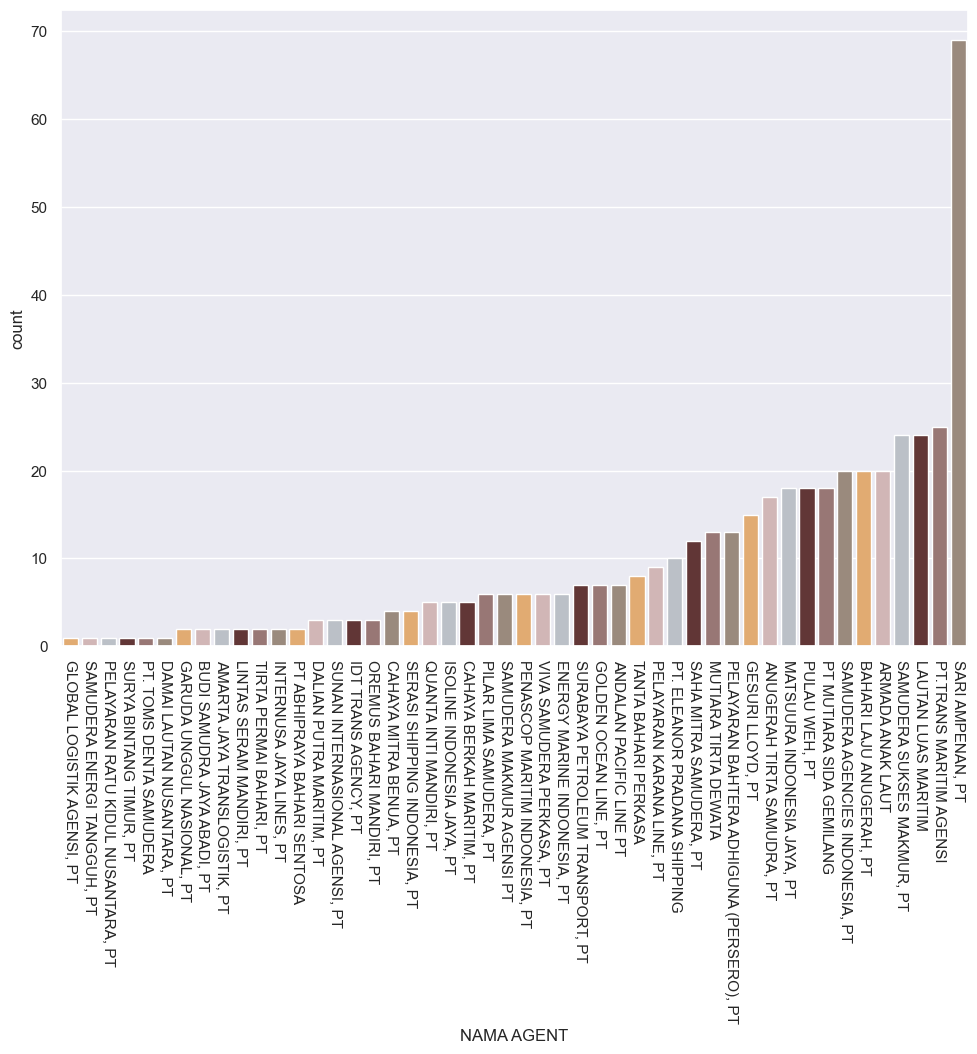

In [17]:
# // Perusahaan Dengan Outlier Paling Tinggi
ax = sbn.barplot(data_outlier["NAMA AGENT"].value_counts().sort_values(), palette=cmap)
ax.tick_params(axis="x", rotation=270)

#### NAMA KAPAL

NAMA KAPAL
SJW MOUNTAIN            71
SRIKANDI FLAMBOYAN      53
BERKAH JAYA MANDIRI     49
BUNGA TERATAI XXV       38
BERLIAN SELATAN         36
                        ..
ARAHAN                   1
HAMCO CPO 2              1
KAPUAS 251               1
ILIR JAYA VII            1
SEJAHTERA MAKMUR VII     1
Name: count, Length: 335, dtype: int64


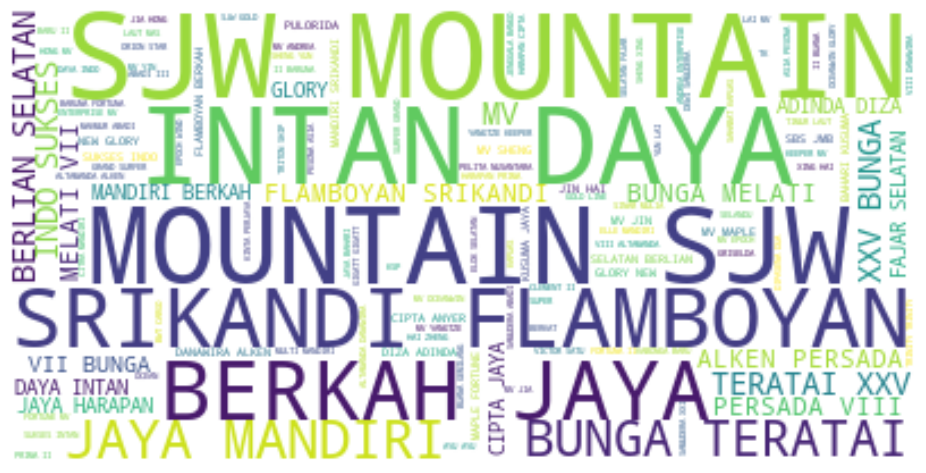

In [18]:
print(dataTOFSheetII["NAMA KAPAL"].value_counts())
text = " ".join(review for review in dataTOFSheetII["NAMA KAPAL"])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TERMINAL
TERMINAL JAMRUD    705
TERMINAL MIRAH     525
TERMINAL NILAM     451
Name: count, dtype: int64


C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\2766604198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(dataTOFSheetII["TERMINAL"].value_counts(), palette=cmap)


<Axes: xlabel='TERMINAL', ylabel='count'>

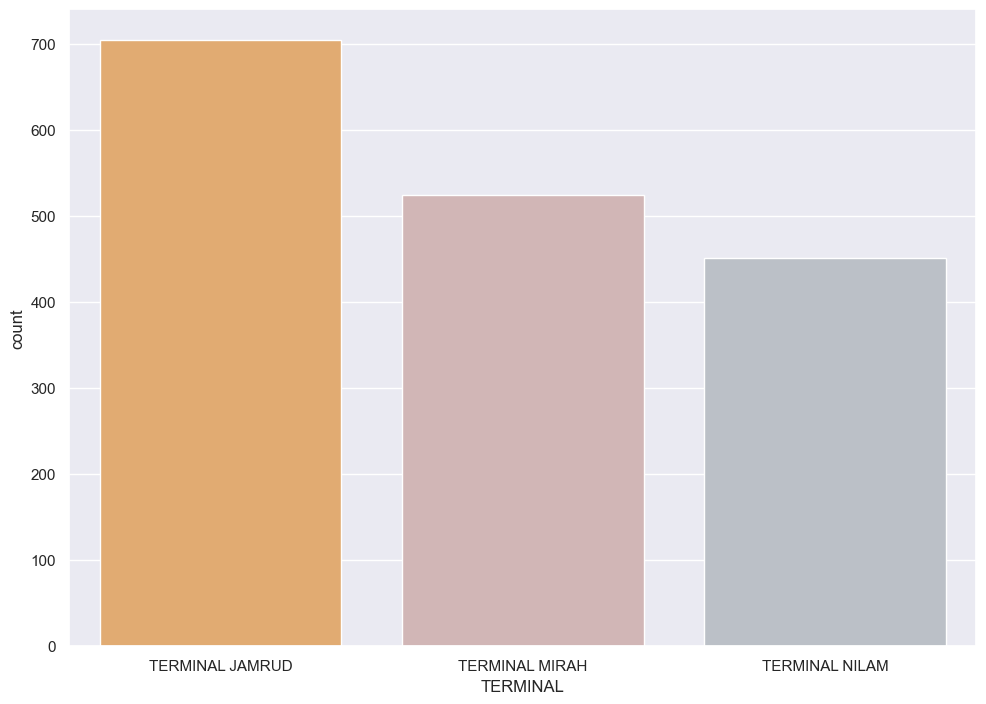

In [19]:
print(dataTOFSheetII["TERMINAL"].value_counts())
sbn.barplot(dataTOFSheetII["TERMINAL"].value_counts(), palette=cmap)

NAMA DERMAGA
JAMRUD SELATAN    443
NILAM TIMUR       323
MIRAH SELATAN     264
MIRAH TIMUR       229
JAMRUD UTARA      201
NILAM UTARA        84
PINDA ASEN         44
JAMRUD BARAT       37
KADE PERAK         24
KADE INTAN         22
KADE BENOA          5
-                   5
Name: count, dtype: int64


C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\2073485440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sbn.barplot(dataTOFSheetII["NAMA DERMAGA"].value_counts().sort_values(), palette=cmap)


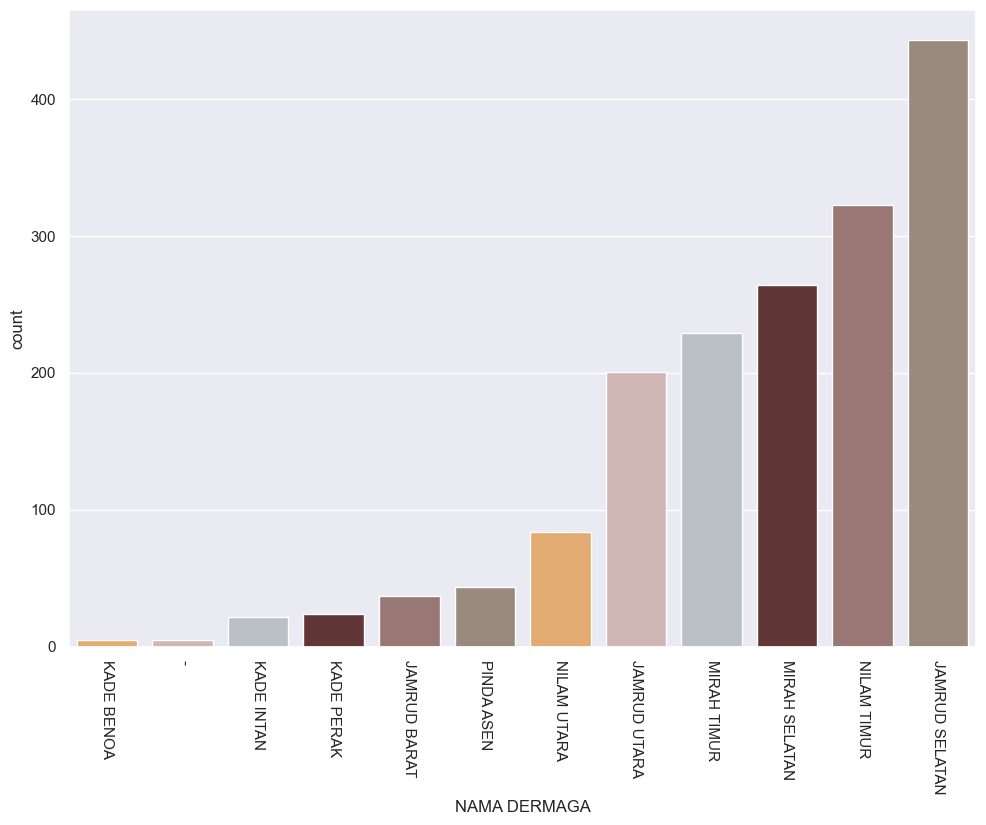

In [20]:
print(dataTOFSheetII["NAMA DERMAGA"].value_counts())
ax = sbn.barplot(dataTOFSheetII["NAMA DERMAGA"].value_counts().sort_values(), palette=cmap)
ax.tick_params(axis="x", rotation=270)

#### KOMODITI

C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\3922852911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sbn.barplot(dataTOFSheetII["KOMODITI"].value_counts().sort_values(), palette=cmap)


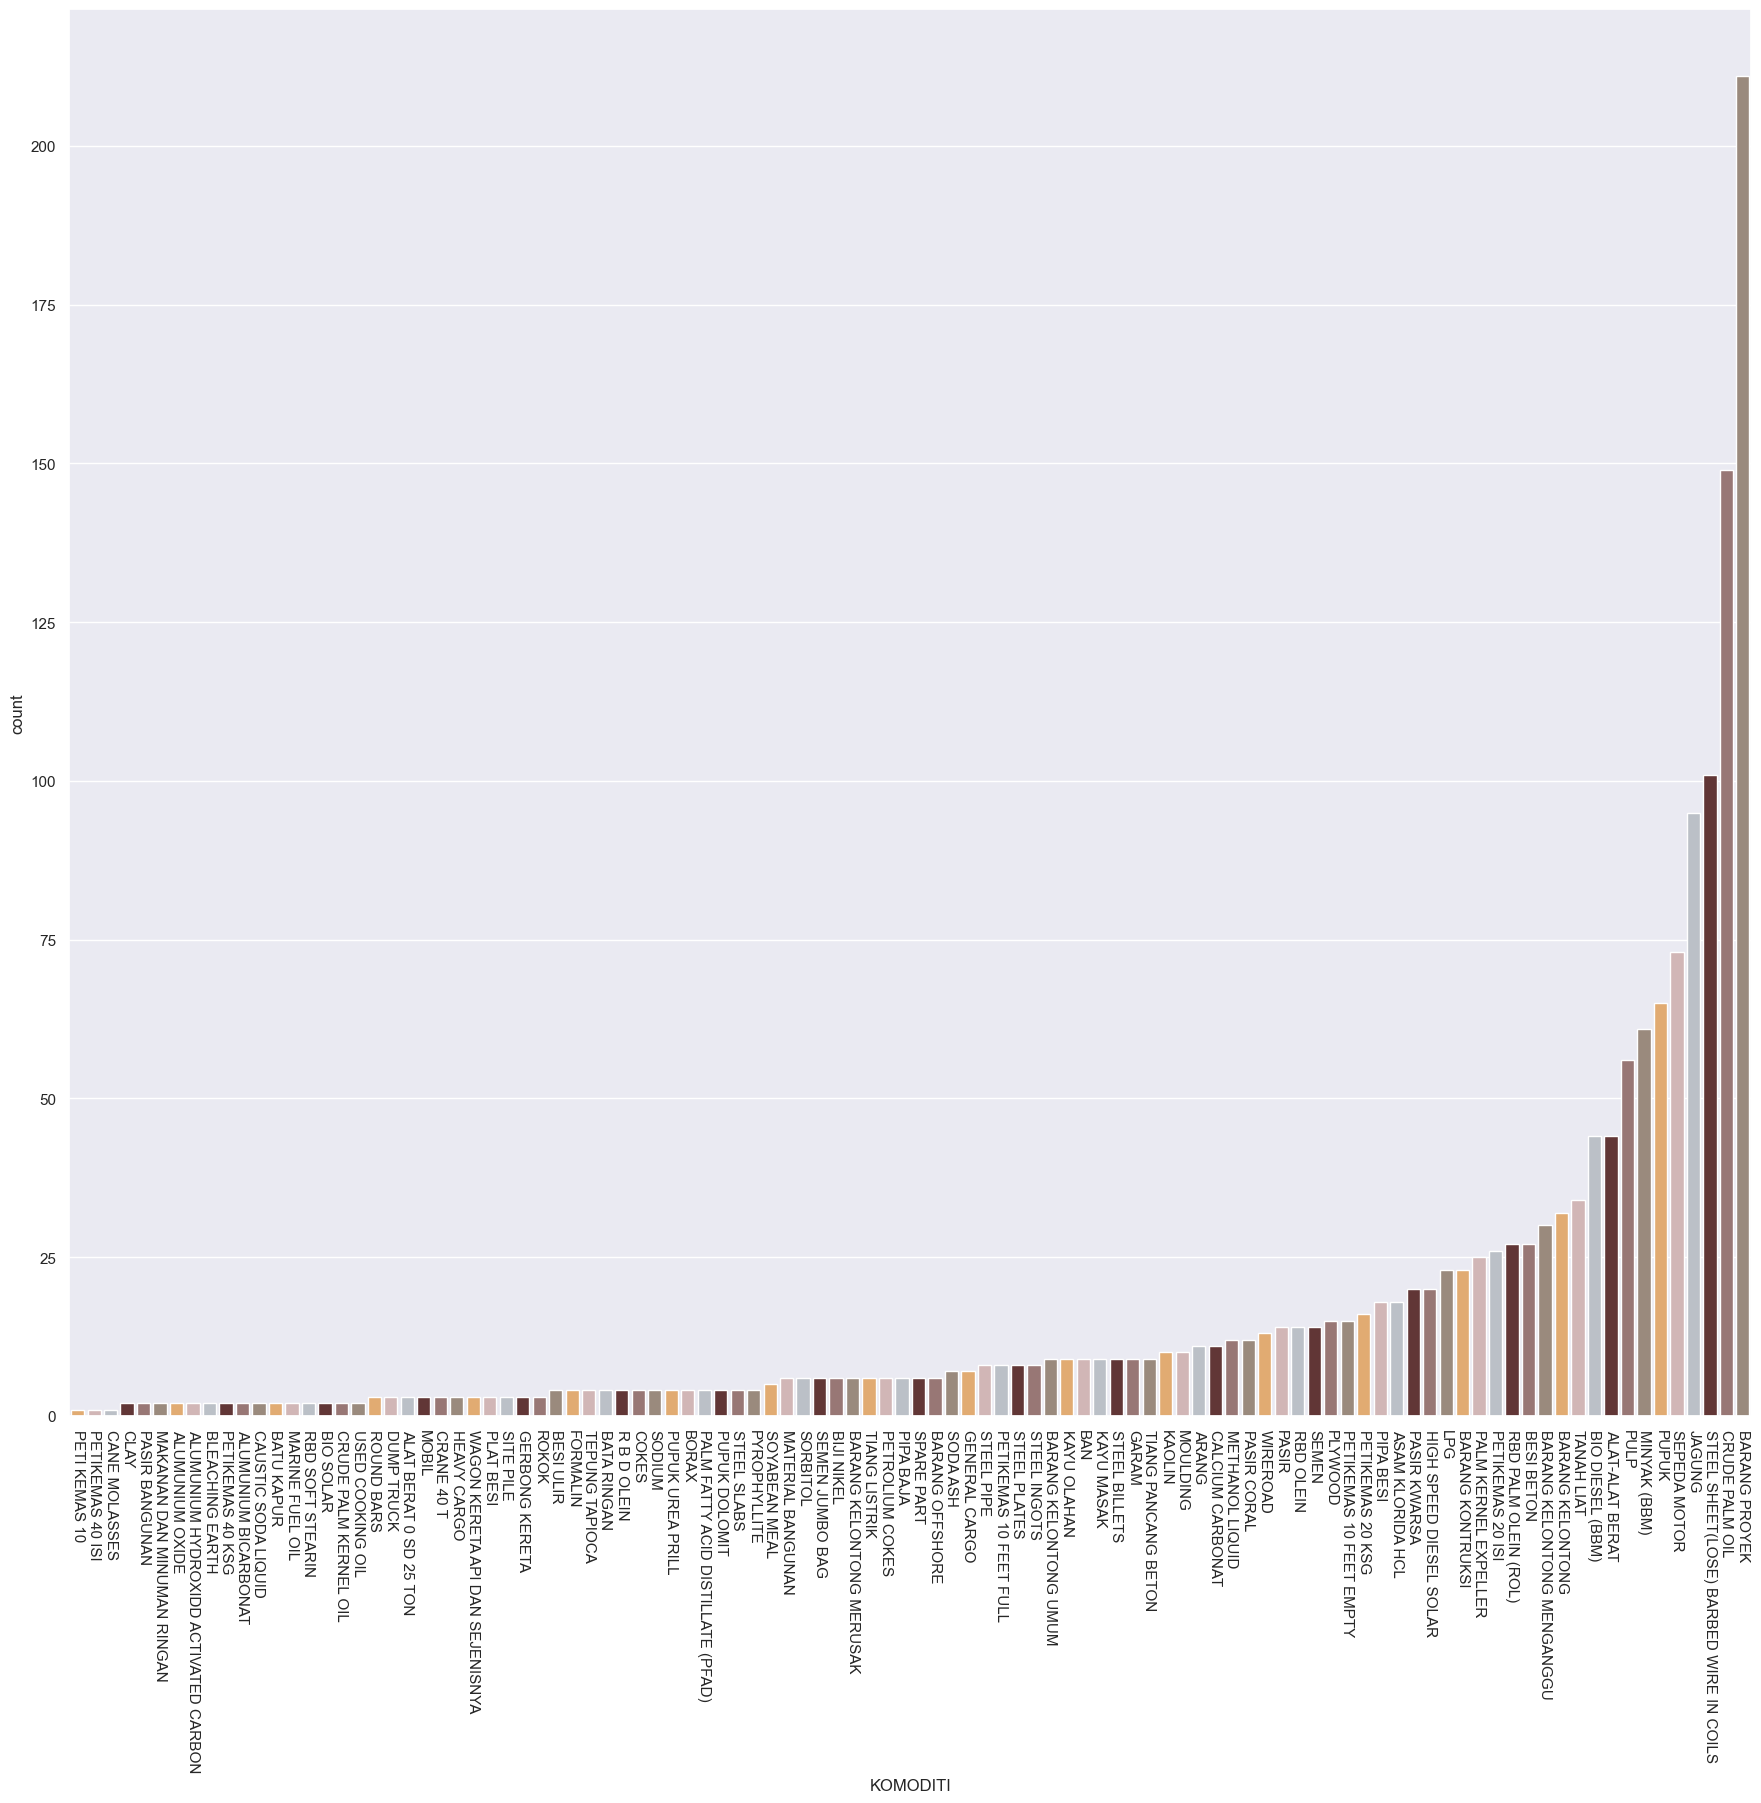

In [21]:
sbn.set_theme(rc={'figure.figsize':(21.7,18.27)})
ax = sbn.barplot(dataTOFSheetII["KOMODITI"].value_counts().sort_values(), palette=cmap)
ax.tick_params(axis="x", rotation=270)

In [22]:
sbn.set_theme(rc={'figure.figsize':(11.7,8.27)})

#### KEGIATAN YANG DILAKSANAKAN

C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\2856620824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(dataTOFSheetII["KEGIATAN"].value_counts().sort_values(), palette=cmap)


<Axes: xlabel='KEGIATAN', ylabel='count'>

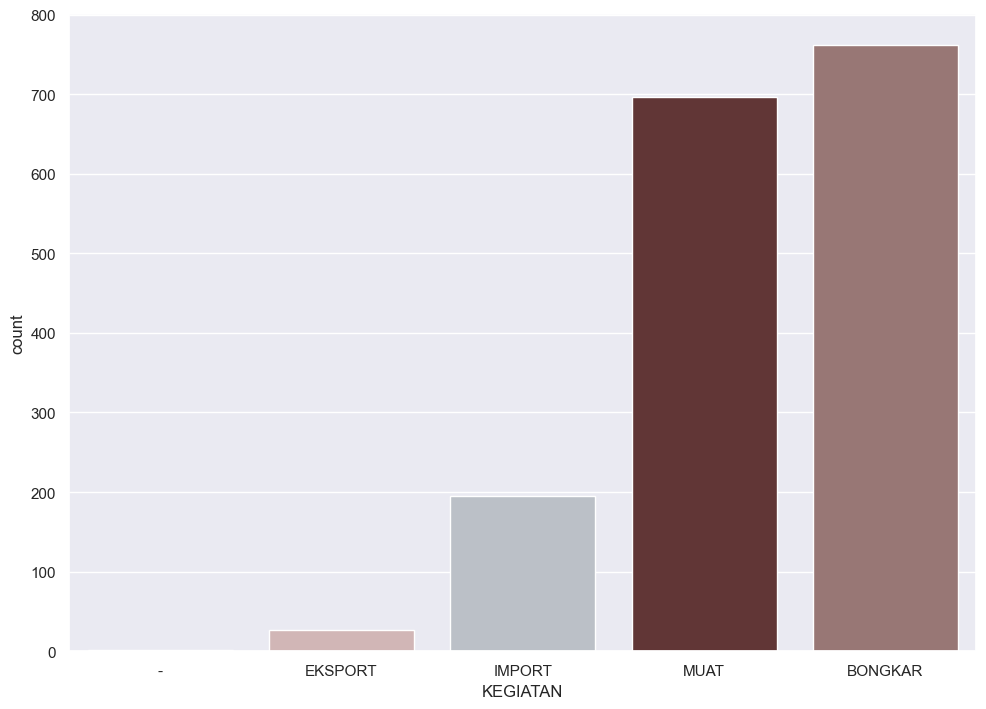

In [23]:
sbn.barplot(dataTOFSheetII["KEGIATAN"].value_counts().sort_values(), palette=cmap)

#### KEMASAN YANG PALING SERING DIGUNAKAN

C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_27244\3527116002.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sbn.barplot(dataTOFSheetII["KEMASAN"].value_counts().sort_values(), palette=cmap)


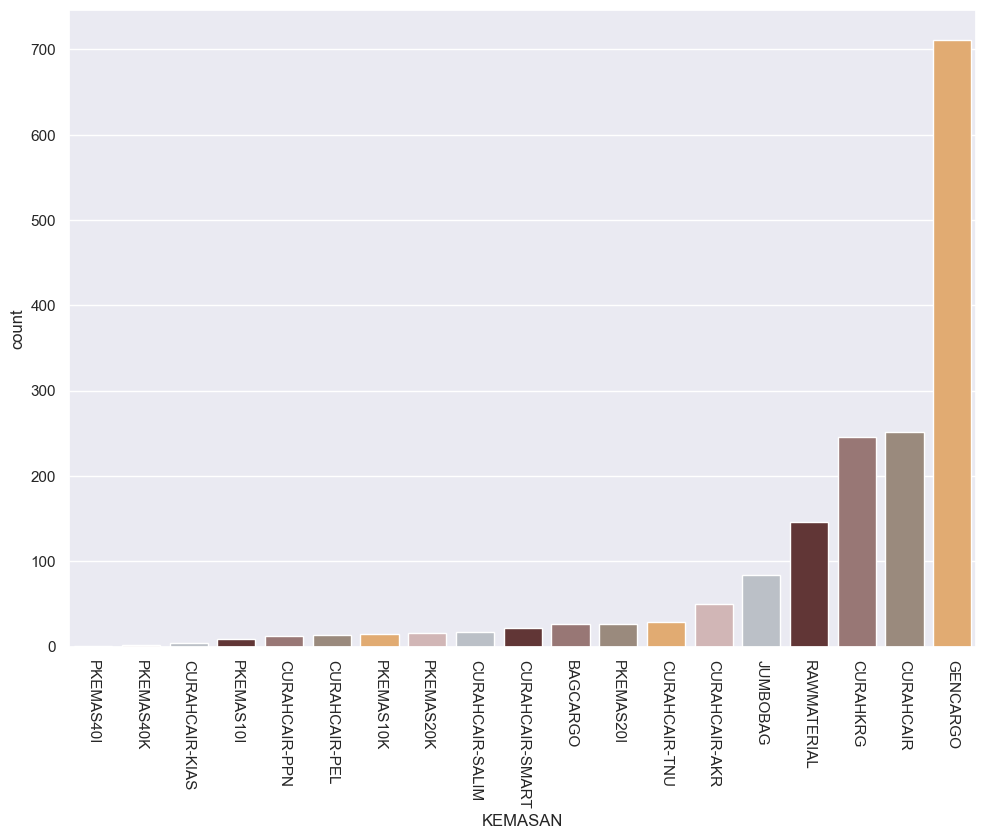

In [24]:
ax = sbn.barplot(dataTOFSheetII["KEMASAN"].value_counts().sort_values(), palette=cmap)
ax.tick_params(axis="x", rotation=270)

### Bivariat

In [25]:
dataTOFSheetII

,TAHUN,BULAN,TERMINAL,NAMA DERMAGA,NAMA KAPAL,NAMA AGENT,KOMODITI,KEGIATAN,STATUS PBM BEFORE,PBM-TOF,KEMASAN,NAMA TERTAGIH,NAMA PBM,NAMA JASA,PRODUKSI,TARIF BEFORE TOF,TAGIHAN BEFORE TOF,TARIF AFTER TOF,TAGIHAN AFTER TOF,SATUAN
0,2025,JUN,TERMINAL JAMRUD,JAMRUD SELATAN,INTAN DAYA 288,"QUANTA INTI MANDIRI, PT",STEEL SHEET(LOSE) BARBED WIRE IN COILS,BONGKAR,NONPELINDO,NONPELINDO,RAWMATERIAL,"WANGSA PRATAMA INTERNASIONAL, PT","WANGSA PRATAMA INTERNASIONAL, PT",DERMAGA,196.00,5100.000000,9.996000e+05,5100.0,999600.0,TON
1,2025,JUN,TERMINAL JAMRUD,JAMRUD SELATAN,INTAN DAYA 288,"QUANTA INTI MANDIRI, PT",STEEL SHEET(LOSE) BARBED WIRE IN COILS,BONGKAR,NONPELINDO,NONPELINDO,RAWMATERIAL,"WANGSA PRATAMA INTERNASIONAL, PT","WANGSA PRATAMA INTERNASIONAL, PT",DERMAGA,6595.00,5100.000000,3.363618e+07,5100.0,33636183.0,TON
2,2025,JUN,TERMINAL JAMRUD,JAMRUD SELATAN,INTAN DAYA 288,"QUANTA INTI MANDIRI, PT",STEEL INGOTS,BONGKAR,NONPELINDO,NONPELINDO,RAWMATERIAL,"WANGSA PRATAMA INTERNASIONAL, PT","WANGSA PRATAMA INTERNASIONAL, PT",DERMAGA,1040.00,3825.000000,3.978956e+06,3825.0,3978956.0,TON
3,2025,JUN,TERMINAL JAMRUD,JAMRUD SELATAN,INDO SUKSES 20,"PULAU WEH, PT",PULP,BONGKAR,NONPELINDO,NONPELINDO,GENCARGO,"WANGSA PRATAMA INTERNASIONAL, PT","WANGSA PRATAMA INTERNASIONAL, PT",DERMAGA,8187.00,2550.000000,2.087794e+07,2550.0,20877941.0,TON
4,2025,JUN,TERMINAL JAMRUD,JAMRUD UTARA,MV. GLORY CHALLENGER,"PELAYARAN BAHTERA ADHIGUNA (PERSERO), PT",STEEL SHEET(LOSE) BARBED WIRE IN COILS,IMPORT,NONPELINDO,NONPELINDO,RAWMATERIAL,"WANGSA PRATAMA INTERNASIONAL, PT","WANGSA PRATAMA INTERNASIONAL, PT",JASA DERMAGA,4420.00,5100.000000,2.254320e+07,5100.0,22543204.0,TON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,2025,AGUSTUS,TERMINAL JAMRUD,KADE PERAK,CAPITOL 1802,"PELAYARAN LESTARI ABADI SERASI, PT",BARANG PROYEK,MUAT,NONPELINDO,NONPELINDO,GENCARGO,"ABADI HARAPAN JAYA, PT","ABADI HARAPAN JAYA,PT.",PENUMPUKAN MASA I,321.60,9021.112652,2.709139e+07,2000.0,643200.0,TON
1677,2025,JUN,TERMINAL MIRAH,MIRAH SELATAN,DEWA SAMUDERA ABADI,"PELAYARAN LESTARI ABADI SERASI, PT",ALAT-ALAT BERAT,MUAT,NONPELINDO,NONPELINDO,GENCARGO,"ABADI HARAPAN JAYA, PT","ABADI HARAPAN JAYA, PT",JASA DERMAGA,123.00,5100.000000,6.273000e+05,5100.0,627300.0,TON
1678,2025,JUN,TERMINAL MIRAH,MIRAH SELATAN,DEWA SAMUDERA ABADI,"PELAYARAN LESTARI ABADI SERASI, PT",ALAT-ALAT BERAT,MUAT,NONPELINDO,NONPELINDO,GENCARGO,"ABADI HARAPAN JAYA, PT","ABADI HARAPAN JAYA, PT",JASA STEVED,123.00,8330.000000,1.024590e+06,17550.0,2158650.0,TON
1679,2025,JUN,TERMINAL MIRAH,MIRAH SELATAN,DEWA SAMUDERA ABADI,"PELAYARAN LESTARI ABADI SERASI, PT",ALAT-ALAT BERAT,MUAT,NONPELINDO,NONPELINDO,GENCARGO,"ABADI HARAPAN JAYA, PT","ABADI HARAPAN JAYA, PT",PENUMPUKAN MASA I,123.00,9021.112652,2.709139e+07,2000.0,246000.0,TON


#### SELISIH TOF

In [26]:
# // Rata - Rata Selisih TOF Tagihan Dan Tarif
tfbefore = [" TARIF BEFORE TOF ", " TAGIHAN BEFORE TOF "]
tfafter = [" TARIF AFTER TOF ", " TAGIHAN AFTER TOF "]
tof_data = pd.DataFrame(columns=[" TARIF BEFORE TOF ", " TAGIHAN BEFORE TOF ", "SELISIH TAGIHAN", "SELISIH TARIF", " TARIF AFTER TOF ", " TAGIHAN AFTER TOF ", "BULAN"])

for i in range(len(dataTOFSheetII[" TAGIHAN AFTER TOF "])):
    tof_data.loc[i, "BULAN"] = dataTOFSheetII.loc[i, "BULAN"]
    tof_data.loc[i, " TARIF BEFORE TOF "] = dataTOFSheetII.loc[i, " TARIF BEFORE TOF "]
    tof_data.loc[i, " TAGIHAN BEFORE TOF "] = dataTOFSheetII.loc[i, " TAGIHAN BEFORE TOF "]
    tof_data.loc[i, " TARIF AFTER TOF "] = dataTOFSheetII.loc[i, " TARIF AFTER TOF "]
    tof_data.loc[i, " TAGIHAN AFTER TOF "] = dataTOFSheetII.loc[i, " TAGIHAN AFTER TOF "]
    tof_data.loc[i, "SELISIH TAGIHAN"] = round(dataTOFSheetII.loc[i, " TAGIHAN AFTER TOF "] - dataTOFSheetII.loc[i, " TAGIHAN BEFORE TOF "], 2)
    tof_data.loc[i, "SELISIH TARIF"] = round(dataTOFSheetII.loc[i, " TARIF AFTER TOF "] - dataTOFSheetII.loc[i, " TARIF BEFORE TOF "])
tof_data

,TARIF BEFORE TOF,TAGIHAN BEFORE TOF,SELISIH TAGIHAN,SELISIH TARIF,TARIF AFTER TOF,TAGIHAN AFTER TOF,BULAN
0,5100.0,999600.0,0.0,0,5100.0,999600.0,JUN
1,5100.0,33636183.0,0.0,0,5100.0,33636183.0,JUN
2,3825.0,3978956.0,0.0,0,3825.0,3978956.0,JUN
3,2550.0,20877941.0,0.0,0,2550.0,20877941.0,JUN
4,5100.0,22543204.0,0.0,0,5100.0,22543204.0,JUN
...,...,...,...,...,...,...,...
1676,9021.112652,27091388.735205,-26448188.74,-7021,2000.0,643200.0,AGUSTUS
1677,5100.0,627300.0,0.0,0,5100.0,627300.0,JUN
1678,8330.0,1024590.0,1134060.0,9220,17550.0,2158650.0,JUN
1679,9021.112652,27091388.735205,-26845388.74,-7021,2000.0,246000.0,JUN


#### SELISIH TAGIAHN TOF

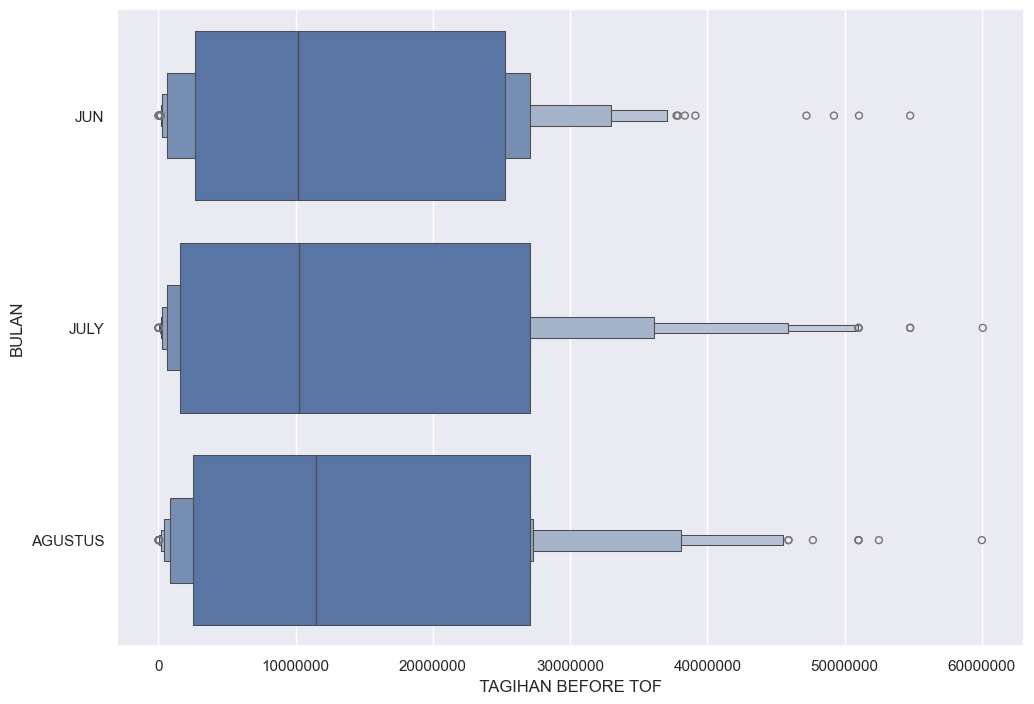

In [27]:
ax = sbn.boxenplot(tof_data, x=" TAGIHAN BEFORE TOF ", y="BULAN")
ax.ticklabel_format(style="plain", axis="x")

<Axes: xlabel=' TARIF BEFORE TOF ', ylabel='BULAN'>

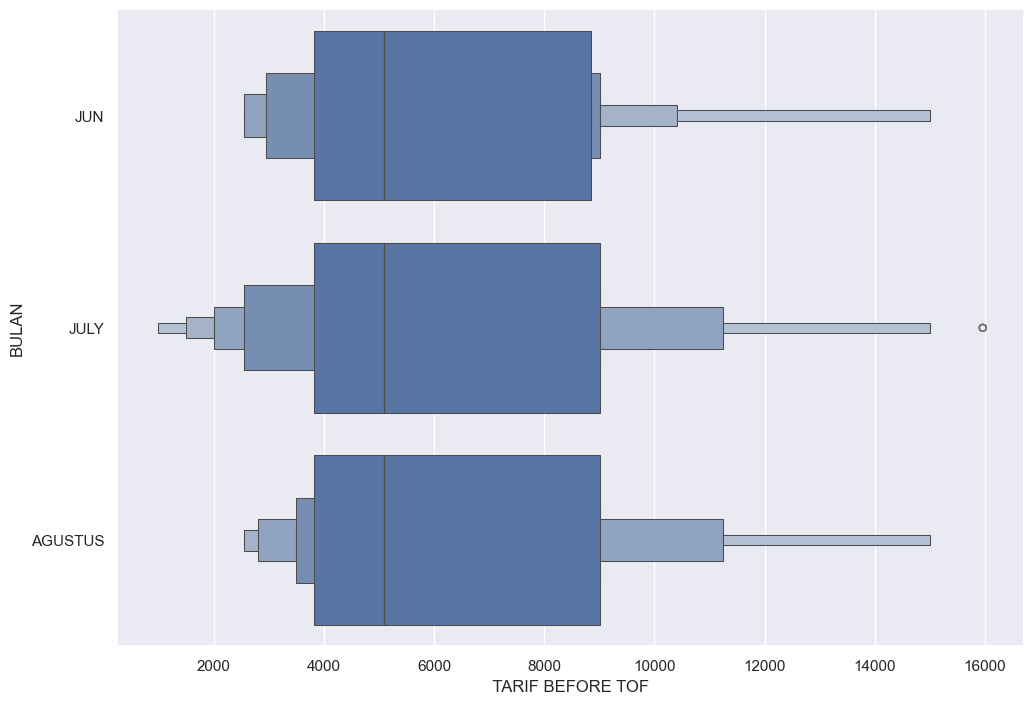

In [28]:
sbn.boxenplot(tof_data, x=" TARIF BEFORE TOF ", y="BULAN")

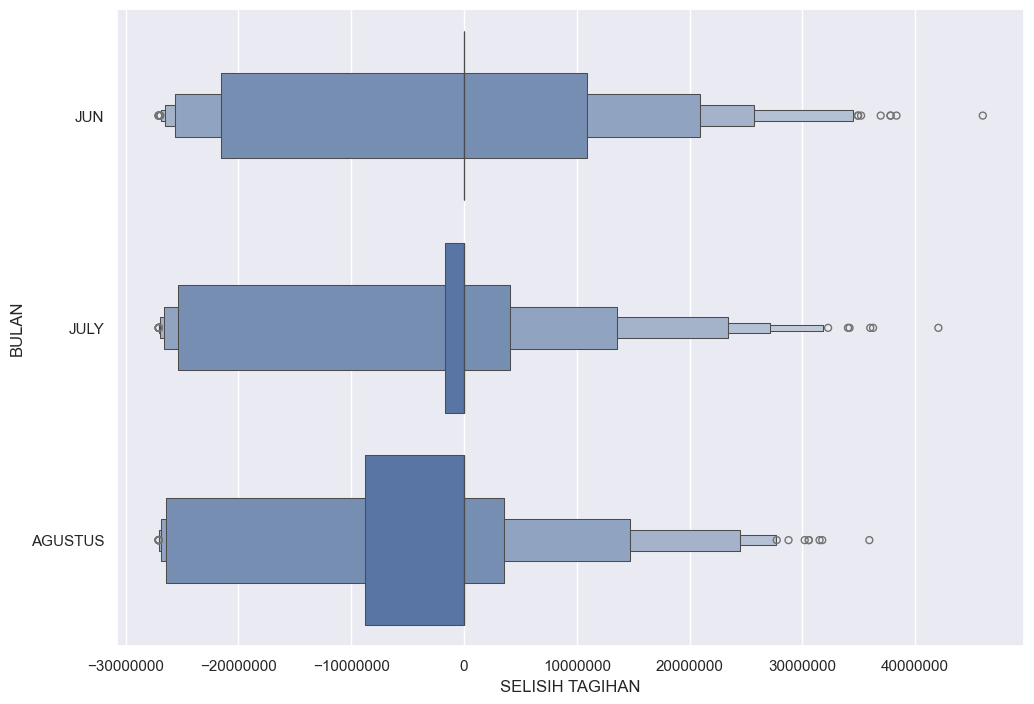

In [29]:
ax = sbn.boxenplot(tof_data, x="SELISIH TAGIHAN", y="BULAN")
ax.ticklabel_format(style="plain", axis="x")

<Axes: xlabel='SELISIH TARIF', ylabel='BULAN'>

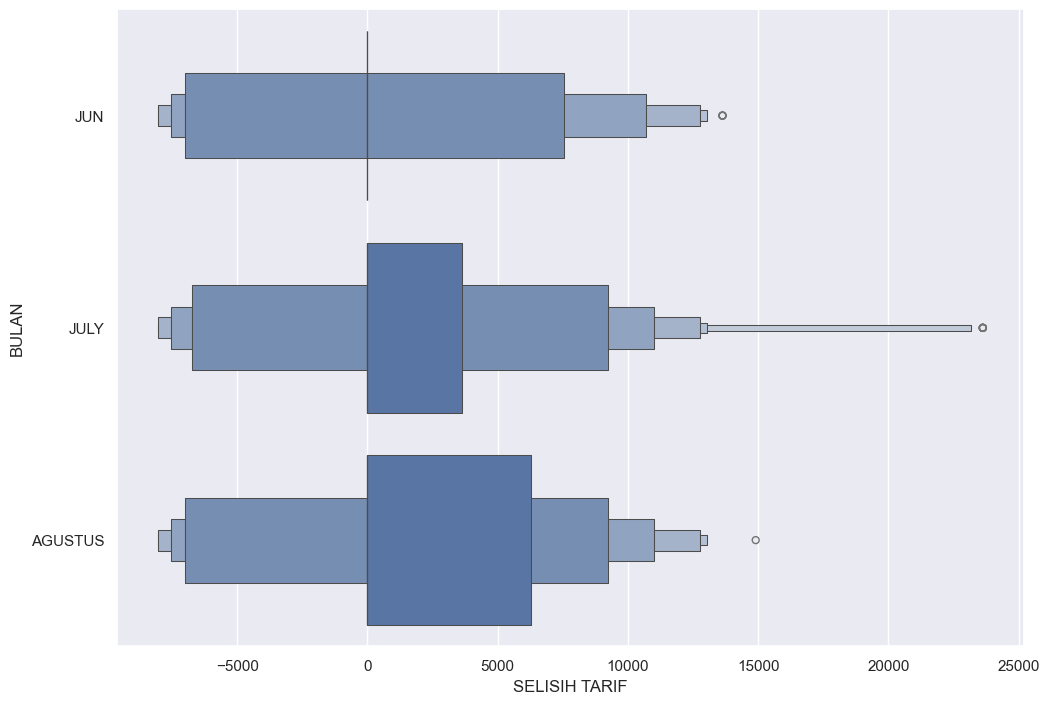

In [30]:

sbn.boxenplot(tof_data, x="SELISIH TARIF", y="BULAN")

#### SELISIH TAGIHAN DENGAN SELISIH TARIF

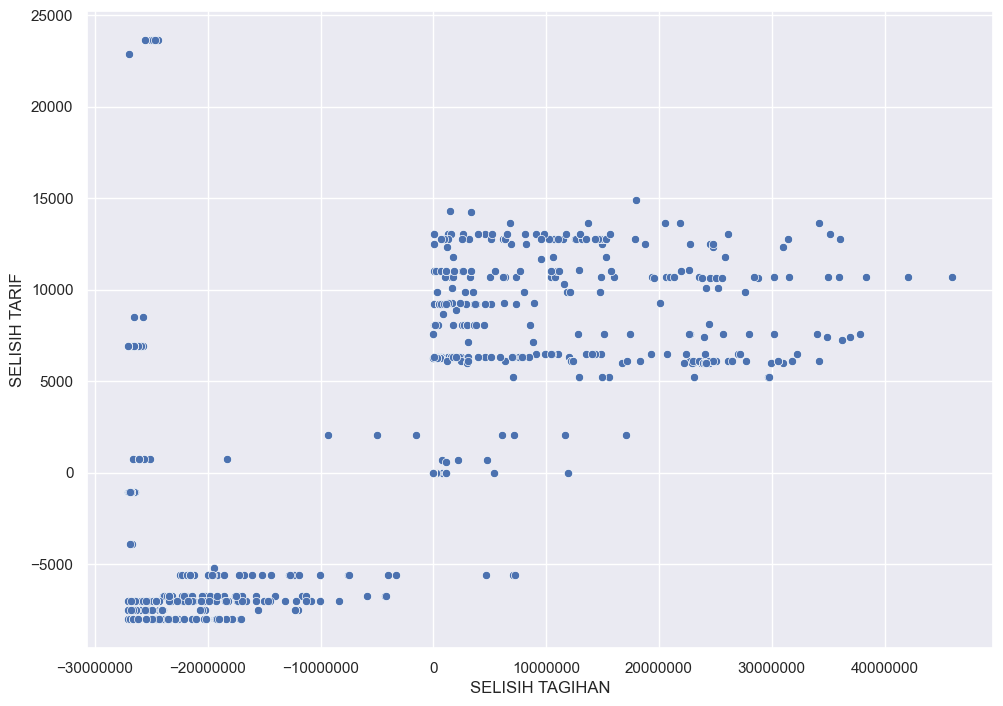

In [31]:
ax = sbn.scatterplot(data=tof_data, x="SELISIH TAGIHAN", y="SELISIH TARIF")
ax.ticklabel_format(style="plain", axis="x")

SEDIKIT TERLIHAT TERDAPAT SUATU KORELASI ANTAR KEDUANYA

                       TARIF BEFORE TOF    TAGIHAN BEFORE TOF   \
 TARIF BEFORE TOF               1.000000              0.435803   
 TAGIHAN BEFORE TOF             0.435803              1.000000   
SELISIH TAGIHAN                -0.390395             -0.474080   
SELISIH TARIF                  -0.047995             -0.402681   
 TARIF AFTER TOF                0.440163             -0.151367   
 TAGIHAN AFTER TOF              0.009085              0.448857   

                      SELISIH TAGIHAN  SELISIH TARIF   TARIF AFTER TOF   \
 TARIF BEFORE TOF           -0.390395      -0.047995           0.440163   
 TAGIHAN BEFORE TOF         -0.474080      -0.402681          -0.151367   
SELISIH TAGIHAN              1.000000       0.650881           0.396435   
SELISIH TARIF                0.650881       1.000000           0.875758   
 TARIF AFTER TOF             0.396435       0.875758           1.000000   
 TAGIHAN AFTER TOF           0.574008       0.286086           0.261571   

           

<Axes: >

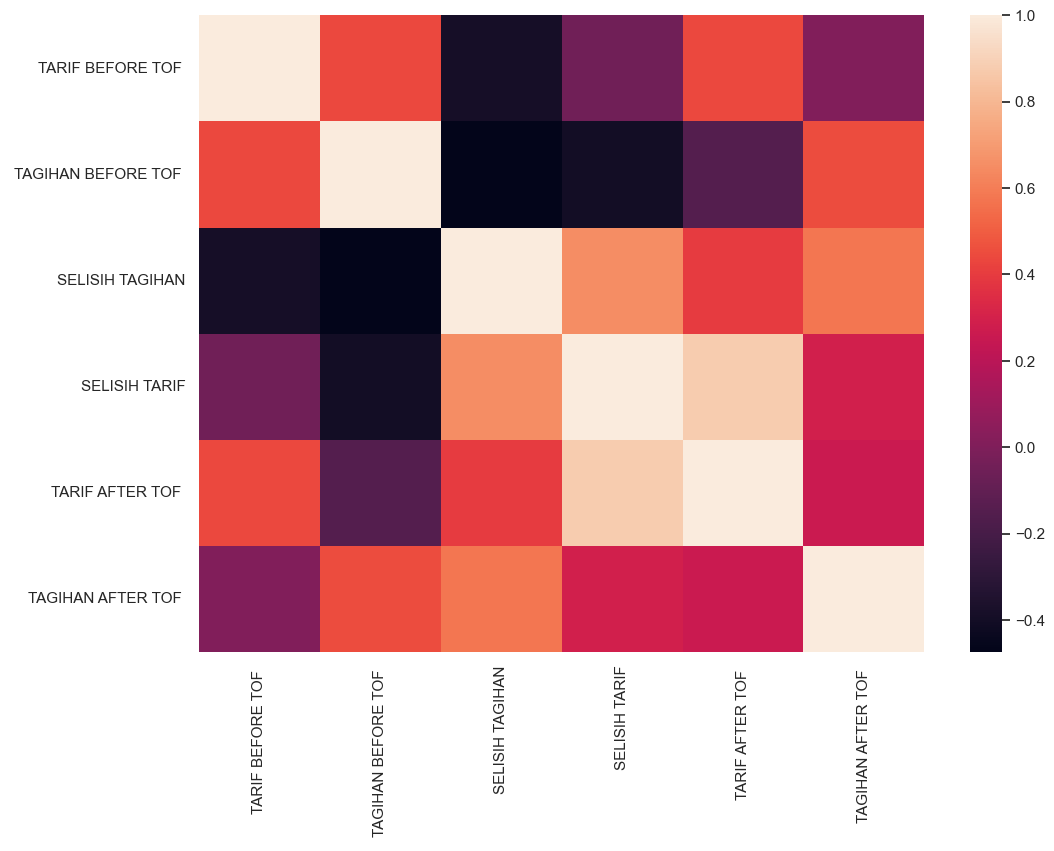

In [32]:
tof_cor = tof_data.drop("BULAN", axis=1).corr(method="pearson")
print(tof_cor)
sbn.heatmap(tof_cor)

SELISIH TAGIHAN DAN SELISIH TARIF MEMILIKI KORELASI DENGAN NILAI 0.6 KE ATAS, Yaitu 0.650881 secara lebih spesifik

In [33]:
# Todo!

### MULTIVARIAT

#### HUBUNGAN PRODUKSI DENGAN BIAYA, TARIF, DAN TAGIHAN

In [34]:
prod_data = dataTOFSheetII[['BULAN', 'KOMODITI', 'KEMASAN', ' PRODUKSI ', ' TAGIHAN BEFORE TOF ', ' TARIF BEFORE TOF ',' TAGIHAN AFTER TOF ', ' TARIF AFTER TOF ' ]]
prod_data

,BULAN,KOMODITI,KEMASAN,PRODUKSI,TAGIHAN BEFORE TOF,TARIF BEFORE TOF,TAGIHAN AFTER TOF,TARIF AFTER TOF
0,JUN,STEEL SHEET(LOSE) BARBED WIRE IN COILS,RAWMATERIAL,196.00,9.996000e+05,5100.000000,999600.0,5100.0
1,JUN,STEEL SHEET(LOSE) BARBED WIRE IN COILS,RAWMATERIAL,6595.00,3.363618e+07,5100.000000,33636183.0,5100.0
2,JUN,STEEL INGOTS,RAWMATERIAL,1040.00,3.978956e+06,3825.000000,3978956.0,3825.0
3,JUN,PULP,GENCARGO,8187.00,2.087794e+07,2550.000000,20877941.0,2550.0
4,JUN,STEEL SHEET(LOSE) BARBED WIRE IN COILS,RAWMATERIAL,4420.00,2.254320e+07,5100.000000,22543204.0,5100.0
...,...,...,...,...,...,...,...,...
1676,AGUSTUS,BARANG PROYEK,GENCARGO,321.60,2.709139e+07,9021.112652,643200.0,2000.0
1677,JUN,ALAT-ALAT BERAT,GENCARGO,123.00,6.273000e+05,5100.000000,627300.0,5100.0
1678,JUN,ALAT-ALAT BERAT,GENCARGO,123.00,1.024590e+06,8330.000000,2158650.0,17550.0
1679,JUN,ALAT-ALAT BERAT,GENCARGO,123.00,2.709139e+07,9021.112652,246000.0,2000.0


<Axes: xlabel='BULAN', ylabel=' PRODUKSI '>

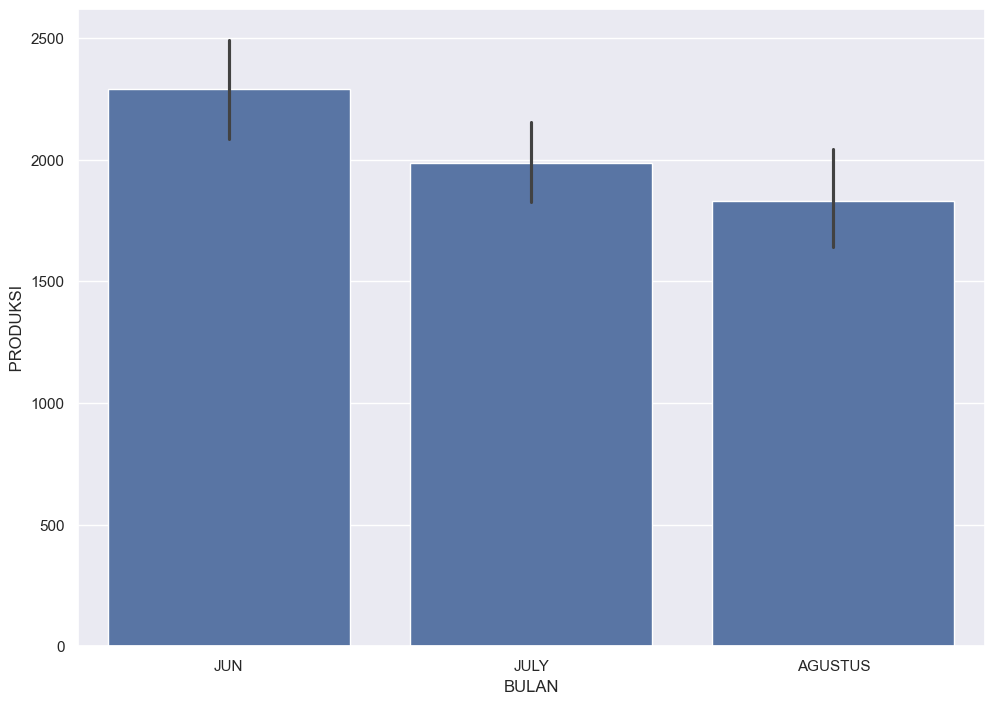

In [35]:
sbn.barplot(prod_data, x='BULAN', y=" PRODUKSI ")

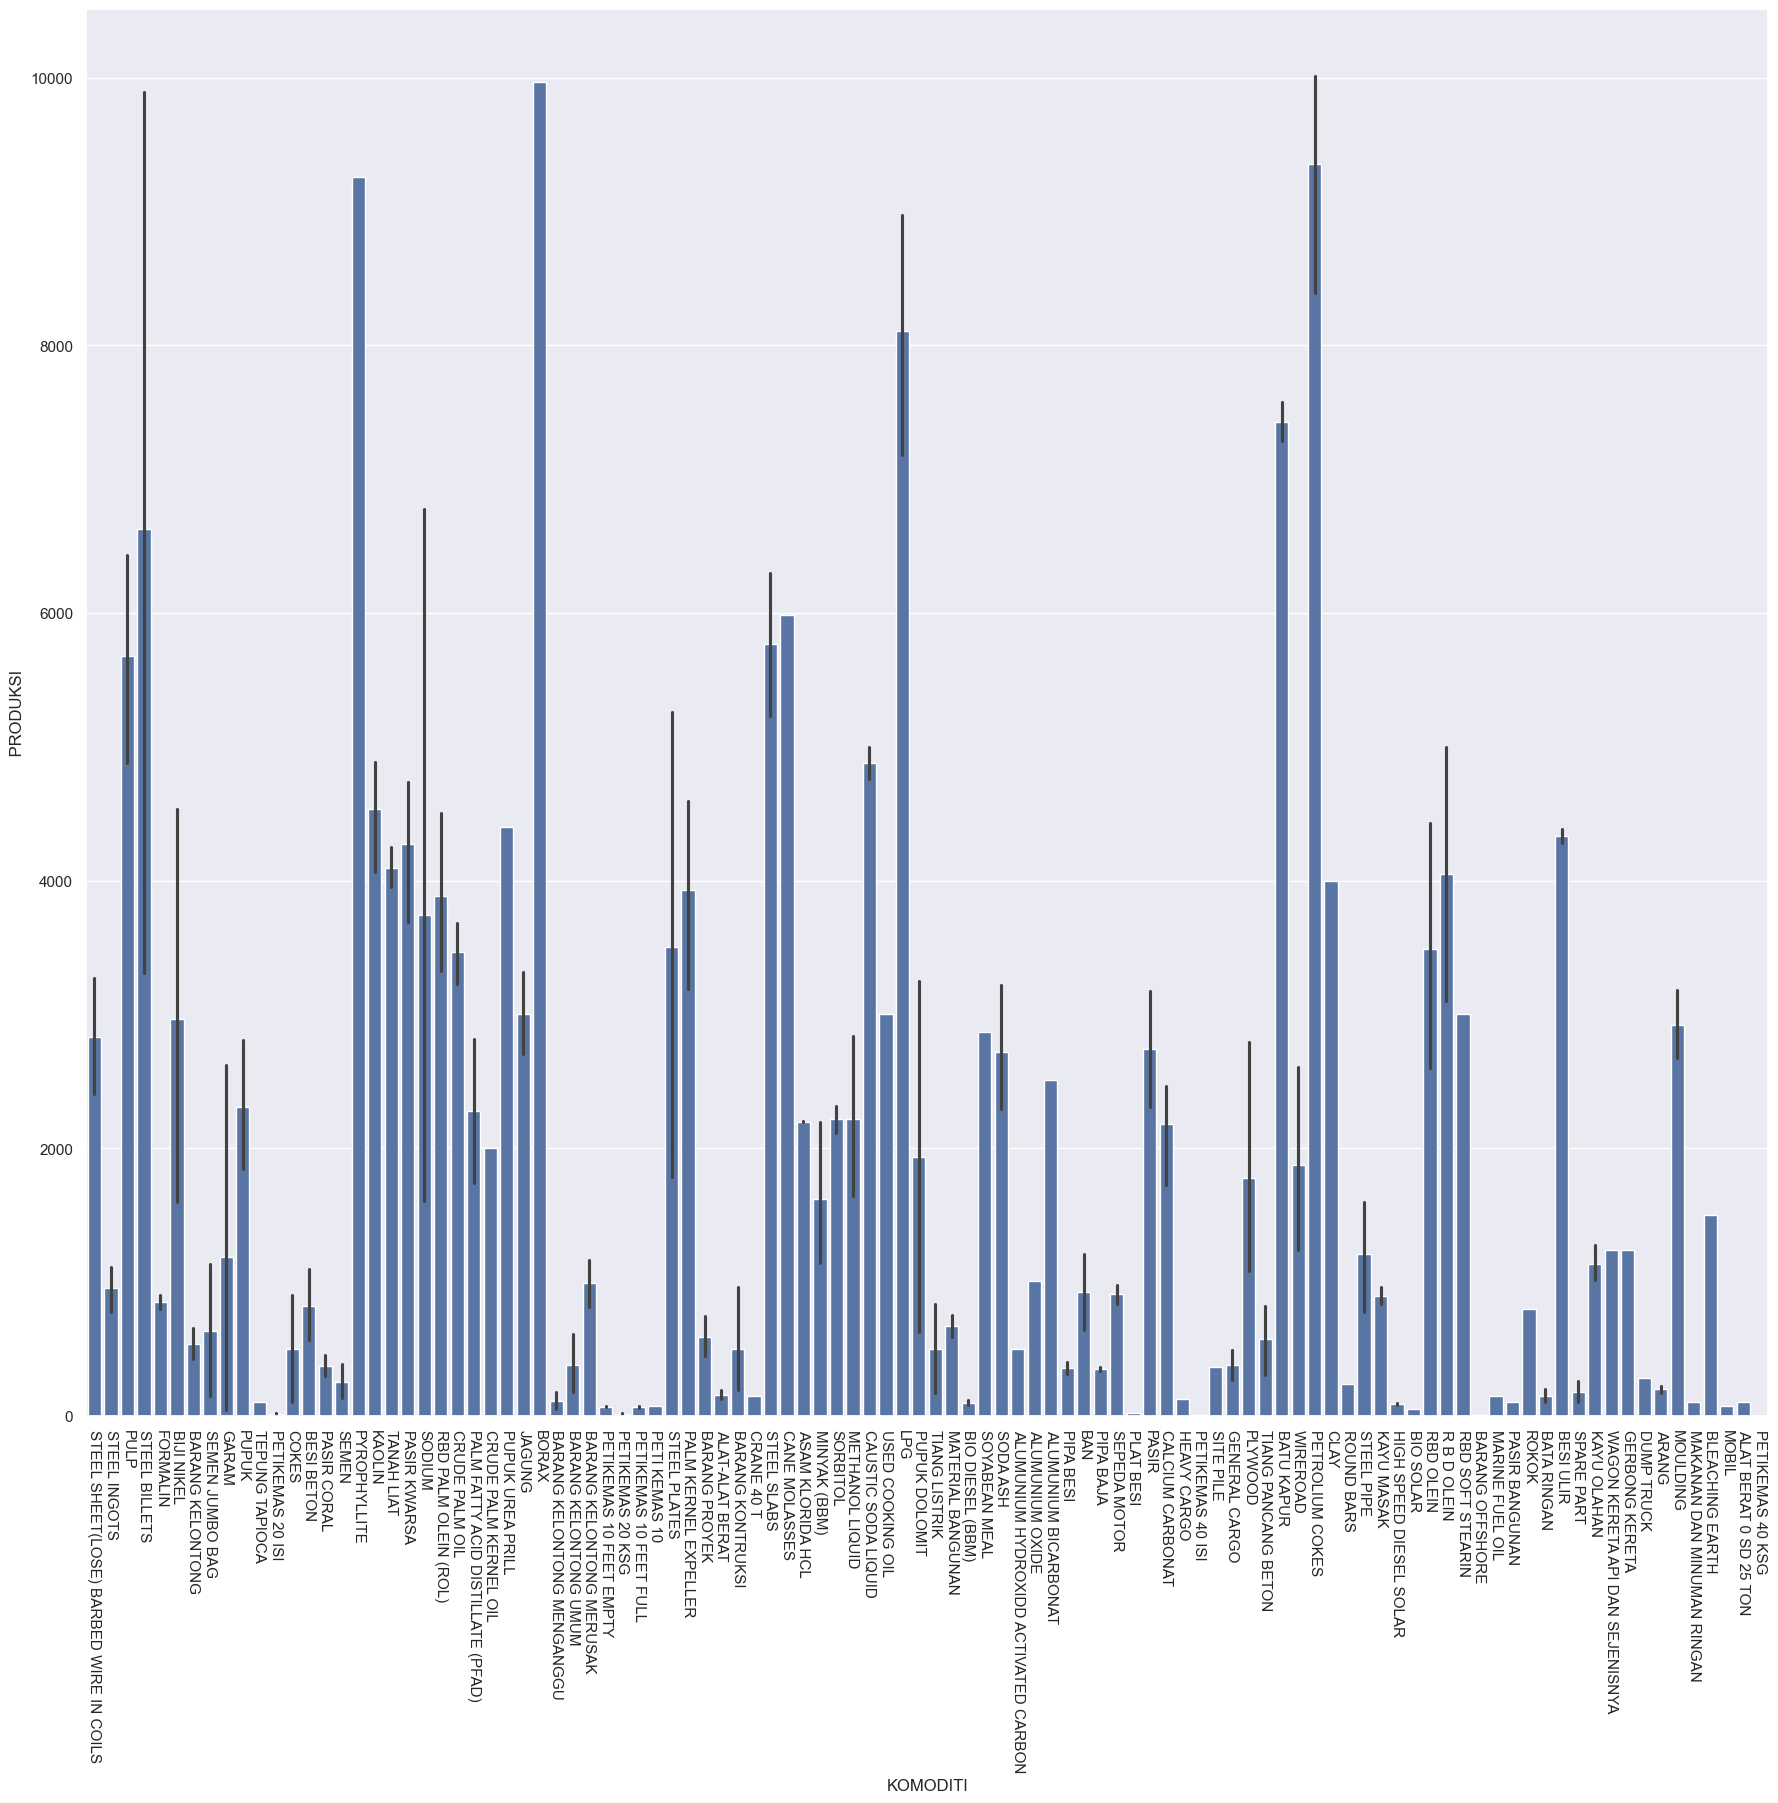

In [36]:
sbn.set_theme(rc={'figure.figsize':(21.7,18.27)})
ax = sbn.barplot(prod_data, x="KOMODITI", y=" PRODUKSI ")
ax.tick_params(axis="x", rotation=270)

                     PRODUKSI   TAGIHAN BEFORE TOF   TARIF BEFORE TOF   \
PRODUKSI              1.000000             0.561775          -0.135014   
TAGIHAN BEFORE TOF    0.561775             1.000000           0.435803   
TARIF BEFORE TOF     -0.135014             0.435803           1.000000   
TAGIHAN AFTER TOF     0.654051             0.448857           0.009085   
TARIF AFTER TOF      -0.264981            -0.151367           0.440163   

                     TAGIHAN AFTER TOF   TARIF AFTER TOF   
PRODUKSI                       0.654051         -0.264981  
TAGIHAN BEFORE TOF             0.448857         -0.151367  
TARIF BEFORE TOF               0.009085          0.440163  
TAGIHAN AFTER TOF              1.000000          0.261571  
TARIF AFTER TOF                0.261571          1.000000  


<Axes: >

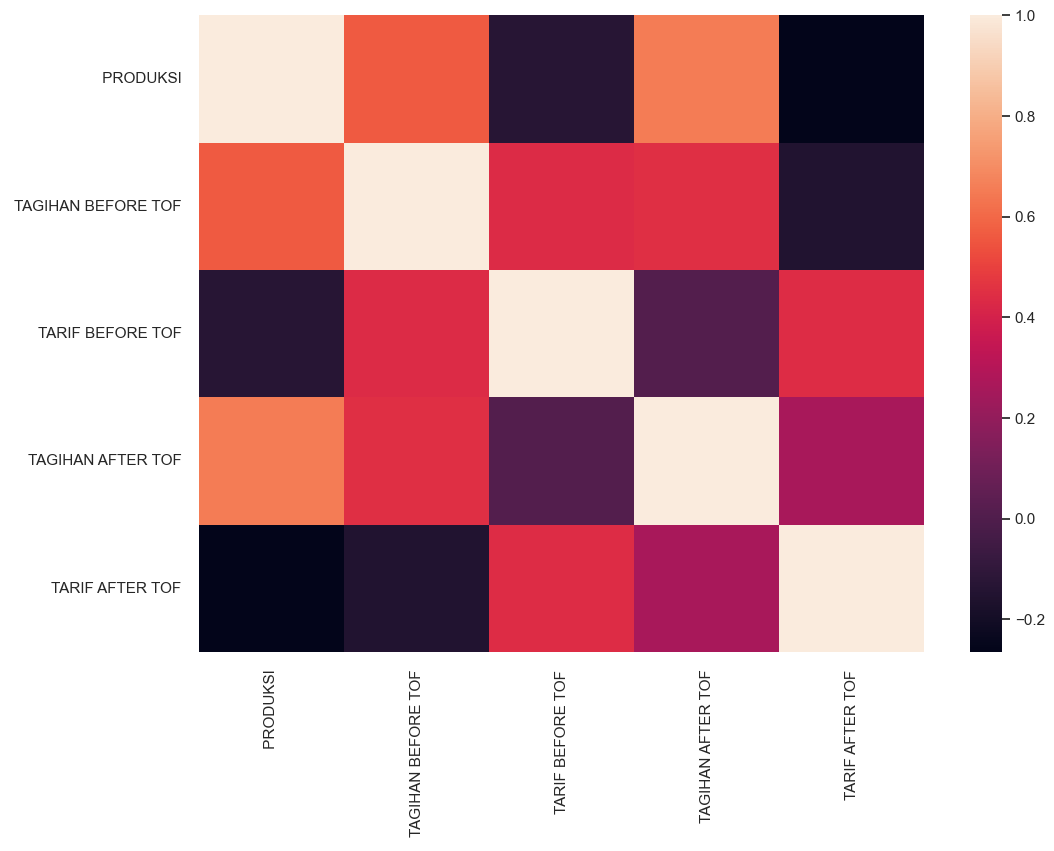

In [37]:
sbn.set_theme(rc={'figure.figsize':(11.7,8.27)})
prod_cor = prod_data.drop(["KOMODITI", "KEMASAN", "BULAN"], axis=1).corr(method="pearson")
print(prod_cor)
sbn.heatmap(prod_cor)

In [ ]:
# ToDo!

In [ ]:
print()